# Visual Area Segmentation

##### copied/adapted from:

https://github.com/zhuangjun1981/NeuroAnalysisTools/blob/master/NeuroAnalysisTools/RetinotopicMapping.py

##### Cite the original work/implementation:

[Zhuang et al., Elife (2017)](https://elifesciences.org/articles/18372)

In [1]:
# load packages:
import numpy as np
import sys
sys.path.append('../src')
import physion.utils.plot_tools as pt
from physion.intrinsic.tools import *
from physion.intrinsic.analysis import RetinotopicMapping
import matplotlib.pylab as plt
from PIL import Image

## Load data

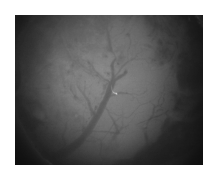

In [29]:
dataFolder = os.path.join(os.path.expanduser('~'), 'DATA', 'CIBELE', 'intrinsic_img', 'SST', 'SST_F4', '12-59-33')
dataFolder = os.path.join(os.path.expanduser('~'), 'DATA', 'CIBELE', 'intrinsic_img', 'PVNR1', 'PVNR1_M3', '14-55-55')
# retinotopic mapping data
maps = np.load(os.path.join(dataFolder, 'raw-maps.npy') , allow_pickle=True).item()
# vasculature picture
imVasc = np.array(Image.open(os.path.join(dataFolder, 'vasculature.tif')))
plt.imshow(imVasc**1, cmap=plt.cm.grey); plt.axis('off');

In [23]:
dataFolder = os.path.join(os.path.expanduser('~'), 'DATA', 'CIBELE', 'intrinsic_img', 'SST', 'SST_F4', '12-59-33')
maps = np.load(os.path.join(os.path.expanduser('~'), 'DATA', 'CIBELE', 'intrinsic_img', 'PVNR1', 'PVNR1_F1', 'PVNR1_F1_ISImaps.npy') ,
               allow_pickle=True).item()

In [25]:
maps

{'mouseID': 'PVNR1_F1',
 'comments': '',
 'dateRecorded': "['C:/Users/a.yann.zerlaut/DATA/2024_07_03/11-25-27']",
 'vasculatureMap': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'altPosMap': array([[ -81.05865887,  -46.82107313,  -26.32124247, ...,  -16.4874089 ,
          -36.65144972,  -80.50976367],
        [ -28.14905746,  -27.82573767,  -30.2614832 , ...,    3.51679552,
         -137.87663494,  -22.1246661 ],
        [ -89.23918352,  -79.82603311,  -91.47854567, ...,   45.33899341,
          -65.12993847,    9.6110988 ],
        ...,
        [ -88.76539316,   31.84795244,  -26.91515325, ...,  -16.68209991,
           -1.56933718,  -14.28862749],
        [ -41.23980463,  -22.58518435,  -27.13823879, ...,   -0.18118132,
          -25.87808322,   24.53627348],
        [-100.70408707,

# Retinotopic Maps

KeyError: 'right-power'

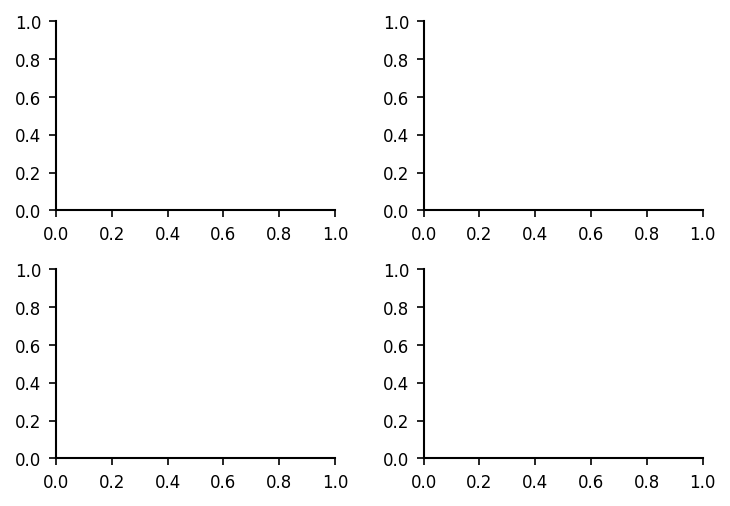

In [24]:
fig, AX = pt.figure(axes=(2,2), figsize=(1.5,2), hspace=0.5, wspace=0.5)

for p, direction in enumerate(['right', 'left']):
    plot_power_map(AX[0][p], fig, maps['%s-power' % direction])
    plot_phase_map(AX[1][p], fig, maps['%s-phase' % direction])
    AX[0][p].set_title(direction)
for ax in pt.flatten(AX):
    ax.axis('off')

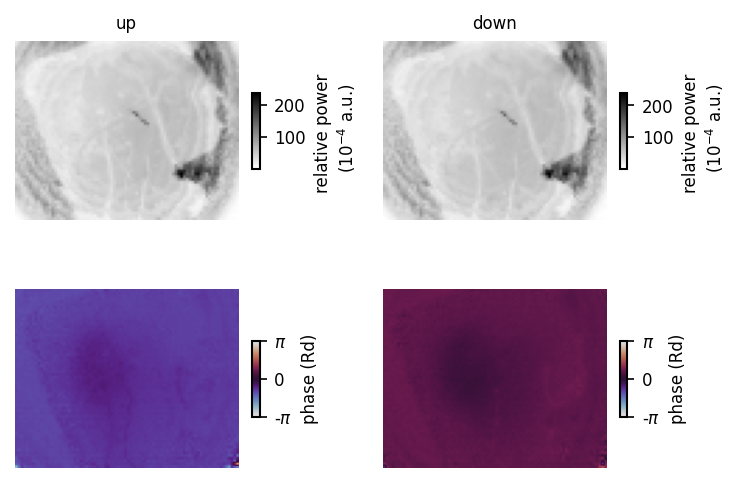

In [13]:
fig, AX = pt.figure(axes=(2,2), figsize=(1.5,2), hspace=0.5, wspace=0.5)

for p, direction in enumerate(['up', 'down']):
    plot_power_map(AX[0][p], fig, maps['%s-power' % direction])
    plot_phase_map(AX[1][p], fig, maps['%s-phase' % direction])
    AX[0][p].set_title(direction)
for ax in pt.flatten(AX):
    ax.axis('off')

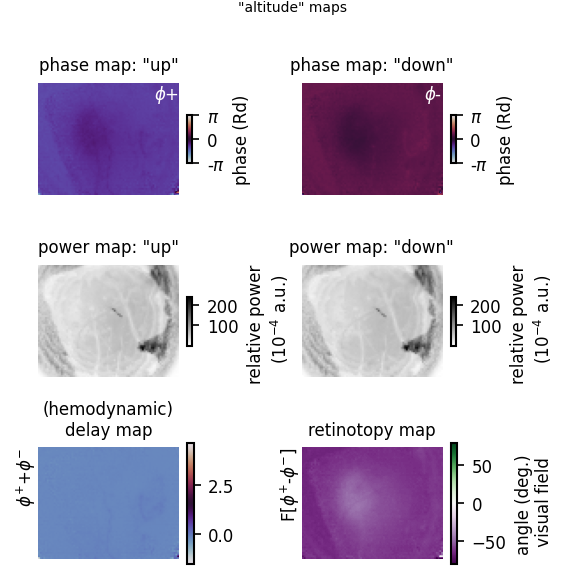

In [14]:
plot_retinotopic_maps(maps, map_type='altitude');

In [ ]:
plot_retinotopic_maps(maps, map_type='azimuth');

# Perform Segmentation

In [ ]:
data = build_trial_data(maps)
segmentation_params={'phaseMapFilterSigma': 2.,
                     'signMapFilterSigma': 2.,
                     'signMapThr': 0.65,
                     'eccMapFilterSigma': 10.,
                     'splitLocalMinCutStep': 5.,
                     'mergeOverlapThr': 0.1,
                     'closeIter': 3,
                     'openIter': 3,
                     'dilationIter': 15,
                     'borderWidth': 1,
                     'smallPatchThr': 100,
                     'visualSpacePixelSize': 0.5,
                     'visualSpaceCloseIter': 15,
                     'splitOverlapThr': 1.1}
data['params'] = segmentation_params
trial = RetinotopicMapping.RetinotopicMappingTrial(**data)
trial.processTrial(isPlot=True)

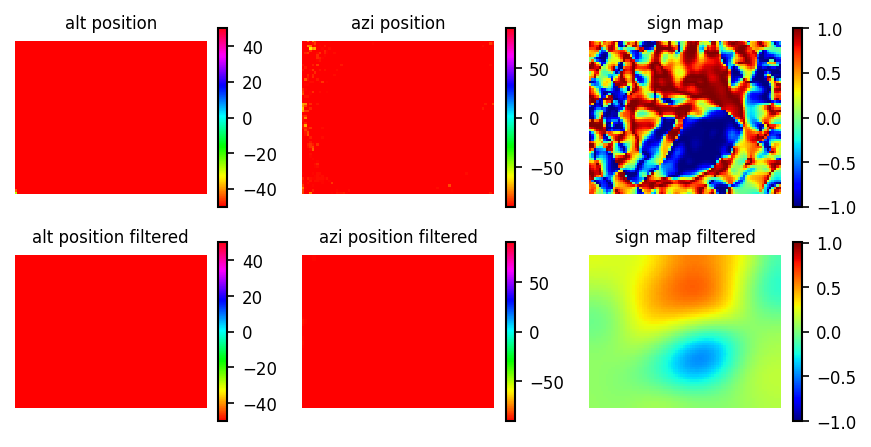

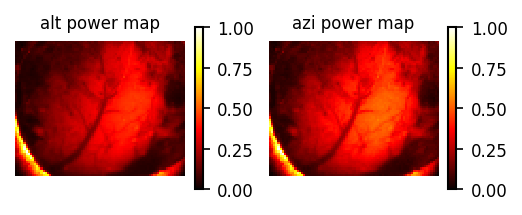

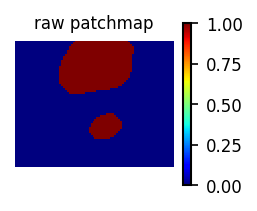

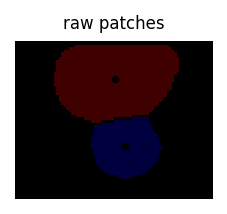

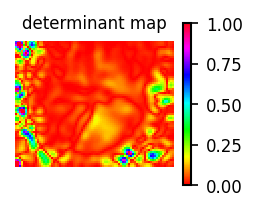

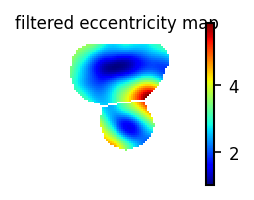

patch01AU=0.0 AS=38.09935613288124 ratio=inf
Only one local minumum was found!!!
patch02AU=0.0 AS=39.96713947081702 ratio=inf
Only one local minumum was found!!!


/home/yann.zerlaut/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yann.zerlaut/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/yann.zerlaut/work/physion/notebooks/../src/physion/intrinsic/RetinotopicMapping.py:1264: RuntimeWarning: divide by zero encountered in scalar divide
  print(key + 'AU=' + str(AU) + ' AS=' + str(AS) + ' ratio=' + str(AS / AU))
/home/yann.zerlaut/work/physion/notebooks/../src/physion/intrinsic/RetinotopicMapping.py:1266: RuntimeWarning: divide by zero encountered in scalar divide
  if AS / AU >= splitOverlapThr:


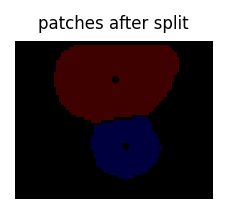

merge iteration: 1


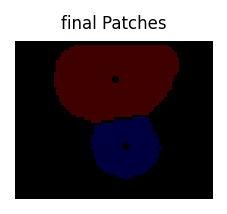

In [28]:
data = np.load(os.path.join(os.path.expanduser('~'), 'DATA', 'CIBELE', 'intrinsic_img', 'PVNR1', 'PVNR1_M3', 'PVNR1_M3_ISImaps.npy') ,
               allow_pickle=True).item()
trial = RetinotopicMapping.RetinotopicMappingTrial(**data)
trial.processTrial(isPlot=True)

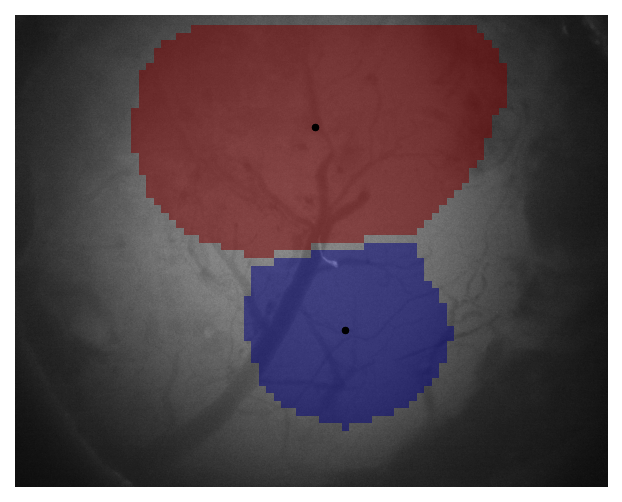

In [30]:
fig, ax = pt.figure(figsize=(5,5))
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.imshow(imVasc, cmap=plt.cm.grey, vmin=imVasc.min(), vmax=imVasc.max(), extent=[*ax.get_xlim(), *ax.get_ylim()])
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.axis('off');
#fig.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'fig.svg'))